In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [5]:
data = pd.read_csv('../data/Ads_Optimisation.csv')

In [6]:
# 10개의 bandit이 있는 것
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


- 3가지 알고리즘을 사용

In [7]:
# 하이퍼 파라미터
N = 10000
d = 10

# 선택된 arm 기록
ads_selected_greedy = []
ads_selected_epsilon_greedy = []
ads_selected_ucb = []

In [9]:
# reward function 
def get_reward(n, ad):
    return data.values[n, ad]

### greedy

In [10]:
total_reward_greedy = []
sums_of_rewards_greedy = np.zeros(d)
numbers_of_selections_greedy = np.zeros(d)

In [11]:
# arm 별로 10번씩의 초기 탐색을 수행
exploration_phase = d * 10 

for n in range(0, N):
    if n < exploration_phase:
        ad = n % d
    else:
        # exploration이 끝나면 가장 보상이 큰 광고를 선택
        ad = np.argmax(sums_of_rewards_greedy / numbers_of_selections_greedy) 
    ads_selected_greedy.append(ad)
    reward = get_reward(n, ad)
    numbers_of_selections_greedy[ad] += 1
    sums_of_rewards_greedy[ad] += reward
    total_reward_greedy.append(reward)

### Epsilon-greedy

In [12]:
epsilon = 0.2
total_reward_epsilon_greedy = []
sums_of_rewards_epsilon_greedy = np.zeros(d)
numbers_of_selections_epsilon_greedy = np.zeros(d)

for n in range(0, N):
    # 확률적으로 exploration 진행
    if random.random() > epsilon:
        ad = np.argmax(sums_of_rewards_epsilon_greedy / (numbers_of_selections_epsilon_greedy + 0.001))
    else:
        ad = random.randrange(d) # exploration
    ads_selected_epsilon_greedy.append(ad)
    reward = get_reward(n, ad)
    numbers_of_selections_epsilon_greedy[ad] += 1
    sums_of_rewards_epsilon_greedy[ad] += reward
    total_reward_epsilon_greedy.append(reward)

### UCB

In [14]:
total_reward_ucb = []
sums_of_rewards_ucb = np.zeros(d)
numbers_of_selections_ucb = np.zeros(d)

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        # 한번이라도 선택한 적 있는 경우
        if (numbers_of_selections_ucb[i] > 0):
            # 평균 리워드 계산
            average_reward = sums_of_rewards_ucb[i] / numbers_of_selections_ucb[i]
            # 안 본 광고에 추가 점수를 주는 delta 계산
            delta_i = math.sqrt(2 * math.log(n + 1) / numbers_of_selections_ucb[i])
            # 과거 평균 값과 upper bound 값을 합해준다 
            upper_bound = average_reward + delta_i
        # 처음 꺼내 본 광고일 경우
        else:
            upper_bound = 1e400
        # max upper bound보다 높을 경우 해당 광고 선택
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected_ucb.append(ad)
    numbers_of_selections_ucb[ad] += 1
    reward = get_reward(n, ad)
    sums_of_rewards_ucb[ad] += reward
    total_reward_ucb.append(reward)

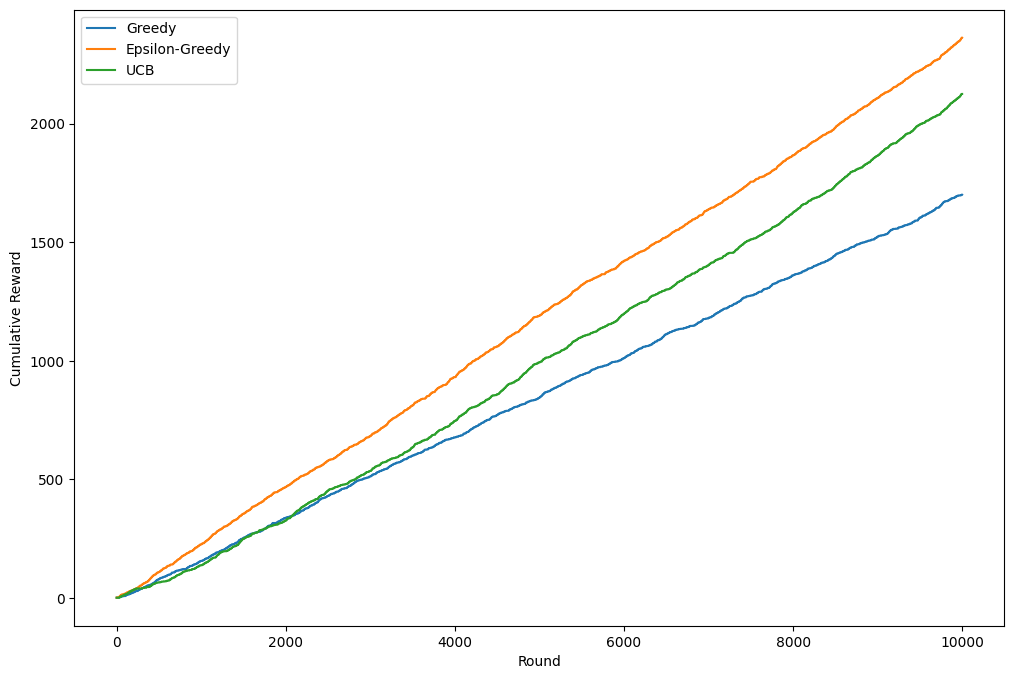

In [15]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(total_reward_greedy), label='Greedy')
plt.plot(np.cumsum(total_reward_epsilon_greedy), label='Epsilon-Greedy')
plt.plot(np.cumsum(total_reward_ucb), label='UCB')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()